In [1]:
import image3d.image3d as image3d
import image3d.xcorr3d as xcorr3d
import image3d.load_data as load_data

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Texture anisotropy analysis
This analysis is inspired from **Lehoucq et al 2015, "Analysis of image vs. position, scale and direction reveals pattern texture anisotropy"**.

It is just an extention of the 2D analysis done in the paper to a 3D analysis.

#### Principle
The main idea is to compute the inertia tensor for a 3D image. From this inertia tensor we can extract anisotropic value and the principal direction of anisotropy.

We note $\vec{M}$ a 3D image, and $I(\vec{M})$ the inertia tensor assiciated to the image $\vec{M}$. The dimention of $I(\vec{M})$ is $3\times3$.

$\lambda_1$, $\lambda_2$, $\lambda_3$ are the eigenvalue of $I(\vec{M})$ associated with the eigenvector $\vec{e_1}$, $\vec{e_2}$, $\vec{e_3}$.

Differente anisotropic parameter can be build :

1) Relative anisotropy : $std(\lambda_i)/\langle \lambda_i \rangle$

2) Fractional anisotropy : $std(\lambda_i)/\langle \lambda_i^2 \rangle ^{1/2}$

2) 1-Volume ratio anisotropy : $1-\lambda_1\lambda_2\lambda_3/ \langle \lambda_i \rangle ^3$

#### Building a artificial image

In [3]:
size=200 #number of voxel size³
center=size/2

# image
im=np.zeros([size,size,size])


# disk image
rd=int(10)
disk=np.zeros([2*(rd+1),2*(rd+1)])
for i in list(range(2*rd+2)):
    for j in list(range(2*rd+2)):
        if ((i-(rd+1))**2+(j-(rd+1))**2<rd**2):
            disk[i,j]=1
            
# adding disk image
shift=0
for i in list(range(4)):
    k1=center
    for j in [-1,1]:
        k=int(center+j*i*28)
        im[int(j*shift+center-2),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(j*shift+center-1),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(j*shift+center-0),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(j*shift+center+1),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(j*shift+center+2),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        shift+=10
        
res=1 # resolution of the image, size of the Voxel
data=image3d.image3d(im,res)

#### Plot section of this image

Text(0.5, 1.0, 'Image, X section, X=0.5')

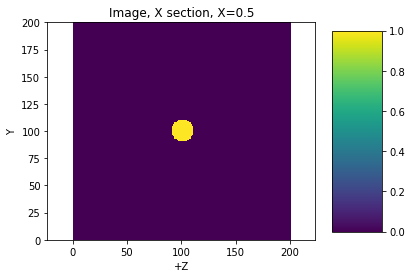

In [4]:
plt.figure()
data.plot('X',0.5)
plt.title('Image, X section, X=0.5')

Text(0.5, 1.0, 'Image, Y section, Y=0.5')

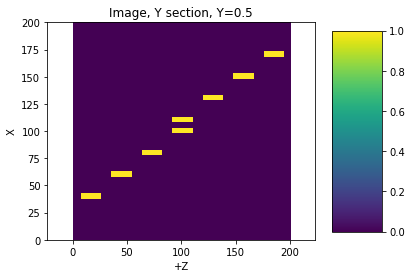

In [5]:
plt.figure()
data.plot('Y',0.5)
plt.title('Image, Y section, Y=0.5')

Text(0.5, 1.0, 'Image, Z section, Z=0.5')

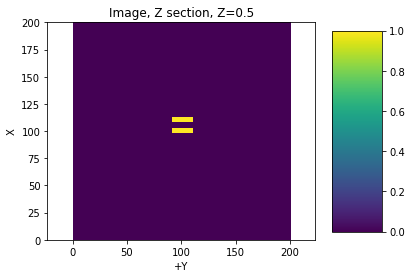

In [6]:
plt.figure()
data.plot('Z',0.5)
plt.title('Image, Z section, Z=0.5')

#### Compute intertia tensor

In [7]:
result=data.texture_anisotropy([np.shape(data.im)[0]])

#### Plot the ellipsoide associated with $I(\vec{M})$

(0, 200)

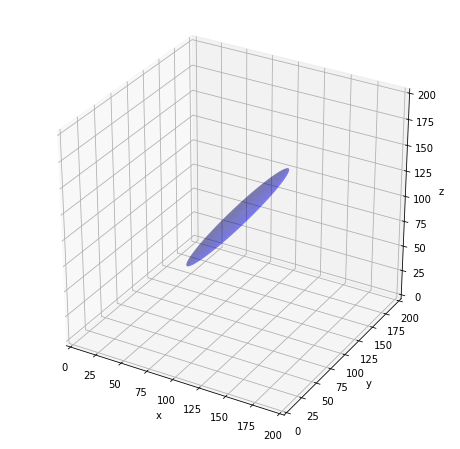

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
k=0
for i in list(range(len(result[0]["Center box"]))):
    image3d.plotell(result[0]["Center box"][i],result[0]["Eigen value"][i],result[0]["Eigen vector"][i],color='b',alpha=0.3,factor=500,ax=ax)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([0,200])
ax.set_ylim([0,200])
ax.set_zlim([0,200])

The relative anisotropy of the inertia tensor is :

In [9]:
print(result[0]['Relative anisotropy'])

[0.69764084]


The principal direction of the relative anisotropy can be plot in a pole figure :

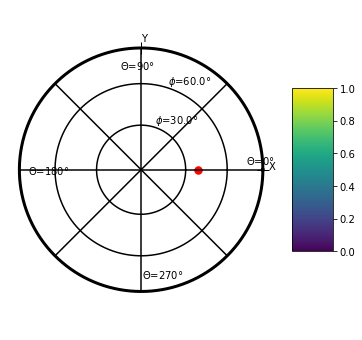

In [10]:
plt.figure(figsize=(6,6))
result[0]['Main vector'].plot_vector('r')

#### Full texture anisotropy analysis

The main idea is to analyse the texture anisotropy at different spatial scale. To do so we will do this analysis for some subset of the initial image $\vec{M}$. 

For instance if $\vec{M}$ as a size of $200\times200\times200$ pixel$^3$. We can make sub image of dimention $100\times100\times100$ pixel$^3$ to do the analysis. In this there will be 8 sub images. 

Then it is possible to compute the average anisotropy for a given subset size $\langle std(\lambda_i)/\langle \lambda_i \rangle \rangle_{subset 100}$ to access to anisotropy at a given scale.

For the orientation we can plot a stereographic projection of pricipal direction of the inertia tensor and compute the second order orientation.

In the following we performed the analysis for subset image of dimention **sb** :

In [11]:
sb=np.linspace(10,200,20)
print(sb)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200.]


In [12]:
dd=data.texture_anisotropy(sb)

We can plot the ellipsoide for the sb=10 pix and sb=200 as the patch building the bigger pattern are 10 pixels wide.

(0, 200)

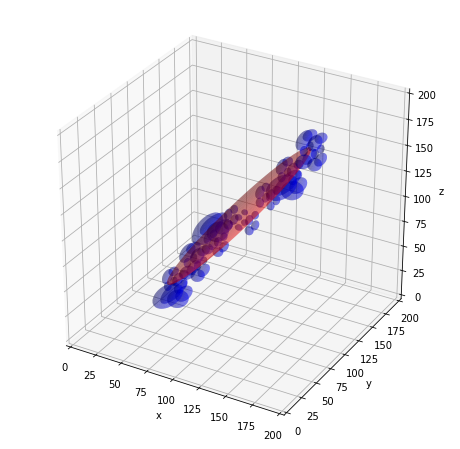

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

cc=['b','r']
fc=[10,700]
sub=[dd[0],dd[-1]]
k=0
for analyse in sub:
    for i in list(range(len(analyse["Center box"]))):
        image3d.plotell(analyse["Center box"][i],analyse["Eigen value"][i],analyse["Eigen vector"][i],color=cc[k],alpha=0.3,factor=fc[k],ax=ax)
    
    k+=1


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([0,200])
ax.set_ylim([0,200])
ax.set_zlim([0,200])

It show that the ellipsoide are aligne in the y direction for nb=10 and aligne in a x+z direction for nb=200. it can visualized using pole figure :

Text(0.5, 1.0, 'Box size = 200 pix')

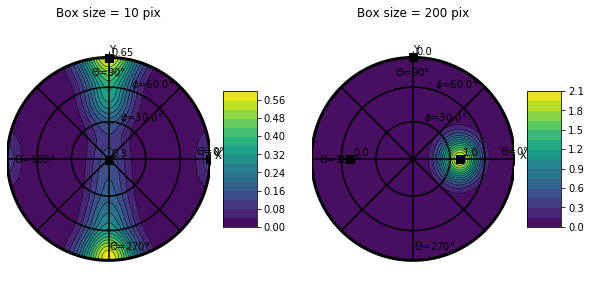

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
dd[0]["Main vector"].stereoplot(contourf=True,bw=0.2)
plt.title('Box size = 10 pix')

plt.subplot(1,2,2)
dd[-1]["Main vector"].stereoplot(contourf=True,bw=0.2)
plt.title('Box size = 200 pix')

This analysis can be shown for more pixel size box.

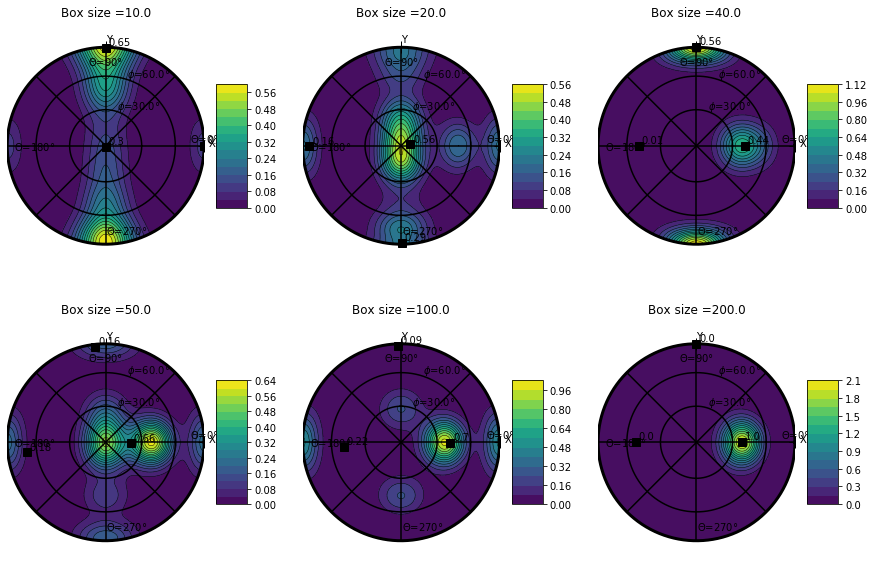

In [15]:
sub=[dd[0],dd[1],dd[3],dd[4],dd[9],dd[19]]
plt.figure(figsize=(15,10))
for i in list(range(6)):
    plt.subplot(2,3,1+i)
    sub[i]["Main vector"].stereoplot(contourf=True,bw=0.2)
    plt.title('Box size ='+str(sub[i]["Size box"]))

We can also plot the mean anisotropy factor in function of the box size $\langle std(\lambda_i)/\langle \lambda_i \rangle \rangle_{subset XX}$ :

In [16]:
size_box=np.zeros([len(dd),1])
ani=np.zeros([len(dd),1])
for i in list(range(len(dd))):
    size_box[i]=dd[i]["Size box"]
    ani[i]=np.nanmean(dd[i]["Relative anisotropy"])

Text(0, 0.5, 'Anisotropy factor')

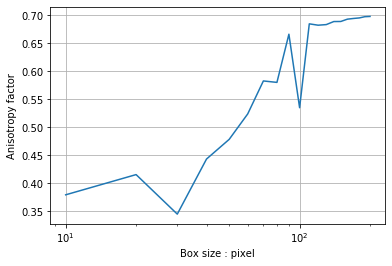

In [17]:
plt.figure()
plt.semilogx(size_box,ani)
plt.grid()
plt.xlabel('Box size : pixel')
plt.ylabel('Anisotropy factor')

#### To Do

Add time serie analysis of image and representation like figure 7. Lehoucq